In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn import datasets, linear_model

In [2]:
# Before we Begin:
# Gorilla Gadgets is one of the middle size ecommerce business in USA. The major platform is Amazon, Walmart, Google, Shopfity.
# In this topic we will going to discuss the buyer behavior about cooler what reason cause the buyer want to buy the cooler

In [3]:
file1 = '631af52d-609a-45d9-bd27-33d7c7457f25.csv'

In [4]:
df = pd.read_csv(file1)

In [5]:
df.head()

,Amount - Order Total,Item - Fill SKU,Item - Price,Item - Qty,Item - SKU,Ship To - State,Date - Order Date
0,207.55,NaN,119.99,1.0,ADJ-DESK-47X23-WALNUT-BLACK,CA,3/2/2021 7:35:29 PM
1,194.83,NaN,119.99,1.0,ADJ-DESK-47X23-BLACK-BLACK,TX,3/3/2021 9:26:08 AM
2,386.85,NaN,359.99,1.0,E1-FLOG-Y6RC,WA,3/3/2021 10:41:52 AM
3,195.73,NaN,119.99,1.0,ADJ-DESK-47X23-BLACK-BLACK,CA,3/3/2021 11:56:27 PM
4,410.50,NaN,385.99,1.0,Treadmill-W-H-0008,CT,3/4/2021 9:51:25 AM


In [6]:
df.shape

(1626, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount - Order Total  1626 non-null   float64
 1   Item - Fill SKU       0 non-null      float64
 2   Item - Price          1605 non-null   float64
 3   Item - Qty            1605 non-null   float64
 4   Item - SKU            1605 non-null   object 
 5   Ship To - State       1626 non-null   object 
 6   Date - Order Date     1626 non-null   object 
dtypes: float64(4), object(3)
memory usage: 89.0+ KB


In [8]:
# now we have to check if there are any null value in the database 

<AxesSubplot:xlabel='index'>

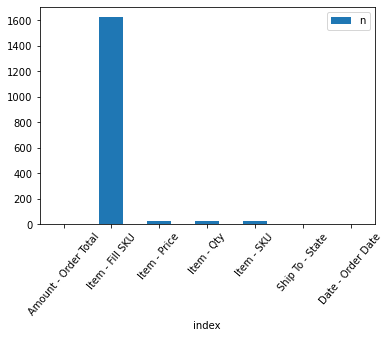

In [9]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=50)

In [10]:
df.isna().sum()

Amount - Order Total       0
Item - Fill SKU         1626
Item - Price              21
Item - Qty                21
Item - SKU                21
Ship To - State            0
Date - Order Date          0
dtype: int64

In [11]:
# We should delete the colume 

In [12]:
del df['Item - Fill SKU']

In [13]:
#check again the null value

<AxesSubplot:xlabel='index'>

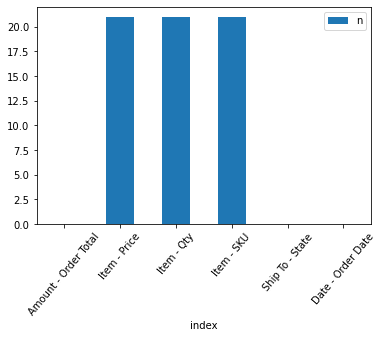

In [14]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=50)

In [15]:
#We have to drop the null value for each row

In [16]:
df1 = df.dropna()

<AxesSubplot:xlabel='index'>

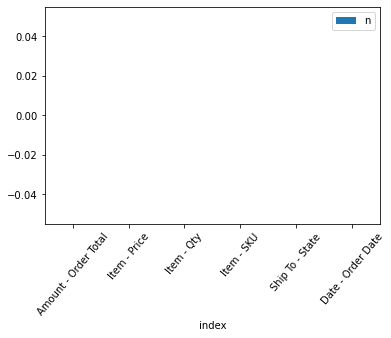

In [17]:
df1.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=50)

In [18]:
#Now we did not have any null value

In [19]:
#Now we have to fliter out the cooler product what we do is use == The SKU with cooler would be the product

In [20]:
cooler = df1[df1['Item - SKU'].str.contains('cool')]

In [21]:
cooler

,Amount - Order Total,Item - Price,Item - Qty,Item - SKU,Ship To - State,Date - Order Date
248,173.39,159.99,1.0,Air-cooler-Non-0001,NV,7/6/2021 1:27:25 PM
251,237.59,219.99,1.0,Air-cooler-Non-0002,AL,7/6/2021 4:48:08 PM
252,233.19,219.99,1.0,Air-cooler-Non-0002,ID,7/6/2021 6:16:08 PM
259,207.56,189.99,1.0,Air-cooler-Non-0002,CA,7/7/2021 4:38:24 PM
260,201.39,189.99,1.0,Air-cooler-Non-0002,KY,7/7/2021 4:39:36 PM
...,...,...,...,...,...,...
1571,668.04,619.99,1.0,P-Aircooler-0003,CA,9/5/2021 12:59:24 PM
1577,661.84,619.99,1.0,P-Aircooler-0003,TX,9/6/2021 7:21:32 AM
1600,286.74,265.99,1.0,Air-cooler-Tower-5,AZ,9/7/2021 1:17:32 PM
1603,287.93,265.99,1.0,Air-cooler-Tower-5,TX,9/7/2021 2:19:42 PM


In [22]:
#now we have the cooler data

In [23]:
#We want to find out which sku sell the most product

In [24]:
Cooler_counter = cooler.groupby('Item - SKU').size().to_frame("N_count").reset_index()

In [25]:
Cooler_counter

,Item - SKU,N_count
0,Air-cooler-Big-1,15
1,Air-cooler-Non-0001,2
2,Air-cooler-Non-0002,209
3,Air-cooler-Non-0002-1,2
4,Air-cooler-Tower-3,23
5,Air-cooler-Tower-4,5
6,Air-cooler-Tower-5,65
7,P-Aircooler-0003,57


Text(0, 0.5, 'N_count')

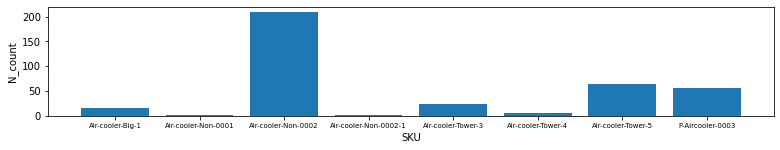

In [26]:
plt.figure(figsize=(13,2))
plt.bar(Cooler_counter['Item - SKU'],Cooler_counter['N_count'],align='center')
plt.xticks(size = 7)
plt.xlabel('SKU')
plt.ylabel('N_count')

In [27]:
#We can see the Air-Cooler-none-0002 is the most sell

In [28]:
#now we want to see the sell every day 

In [29]:
cooler['Date - Order Date']

248      7/6/2021 1:27:25 PM
251      7/6/2021 4:48:08 PM
252      7/6/2021 6:16:08 PM
259      7/7/2021 4:38:24 PM
260      7/7/2021 4:39:36 PM
                ...         
1571    9/5/2021 12:59:24 PM
1577     9/6/2021 7:21:32 AM
1600     9/7/2021 1:17:32 PM
1603     9/7/2021 2:19:42 PM
1612     9/7/2021 9:35:51 PM
Name: Date - Order Date, Length: 378, dtype: object

In [30]:
#We need to conver to day only

In [31]:
cooler['date']= pd.to_datetime(cooler['Date - Order Date'], errors='coerce')

<ipython-input-31-a252b7160c74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cooler['date']= pd.to_datetime(cooler['Date - Order Date'], errors='coerce')


In [32]:
cooler['date'] = cooler.date.dt.to_period('d')

<ipython-input-32-9e498ce80a89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cooler['date'] = cooler.date.dt.to_period('d')


In [33]:
cooler

,Amount - Order Total,Item - Price,Item - Qty,Item - SKU,Ship To - State,Date - Order Date,date
248,173.39,159.99,1.0,Air-cooler-Non-0001,NV,7/6/2021 1:27:25 PM,2021-07-06
251,237.59,219.99,1.0,Air-cooler-Non-0002,AL,7/6/2021 4:48:08 PM,2021-07-06
252,233.19,219.99,1.0,Air-cooler-Non-0002,ID,7/6/2021 6:16:08 PM,2021-07-06
259,207.56,189.99,1.0,Air-cooler-Non-0002,CA,7/7/2021 4:38:24 PM,2021-07-07
260,201.39,189.99,1.0,Air-cooler-Non-0002,KY,7/7/2021 4:39:36 PM,2021-07-07
...,...,...,...,...,...,...,...
1571,668.04,619.99,1.0,P-Aircooler-0003,CA,9/5/2021 12:59:24 PM,2021-09-05
1577,661.84,619.99,1.0,P-Aircooler-0003,TX,9/6/2021 7:21:32 AM,2021-09-06
1600,286.74,265.99,1.0,Air-cooler-Tower-5,AZ,9/7/2021 1:17:32 PM,2021-09-07
1603,287.93,265.99,1.0,Air-cooler-Tower-5,TX,9/7/2021 2:19:42 PM,2021-09-07


In [34]:
day_time_sale = cooler.groupby(['date']).size().to_frame("N_count").reset_index()

In [35]:
day_time_sale

,date,N_count
0,2021-07-06,3
1,2021-07-07,10
2,2021-07-08,9
3,2021-07-09,9
4,2021-07-10,11
...,...,...
59,2021-09-03,2
60,2021-09-04,1
61,2021-09-05,2
62,2021-09-06,1


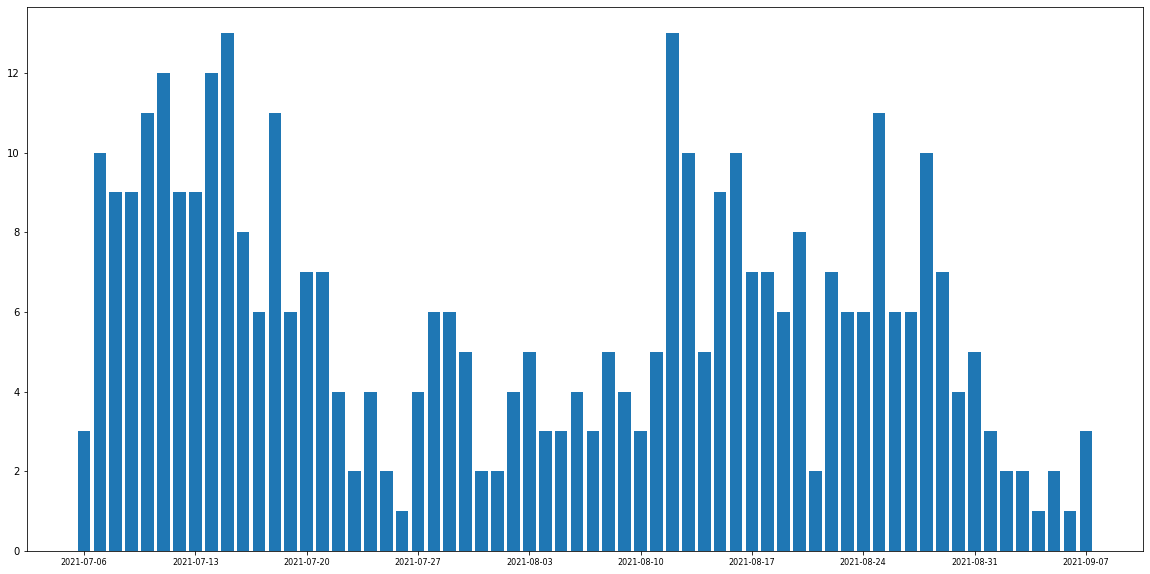

In [36]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(day_time_sale.N_count)), day_time_sale.date, size='small')
plt.xticks(size = 8)
plt.bar(range(len(day_time_sale.N_count)), day_time_sale.N_count, align='center')
plt.locator_params(axis='x', nbins=10)



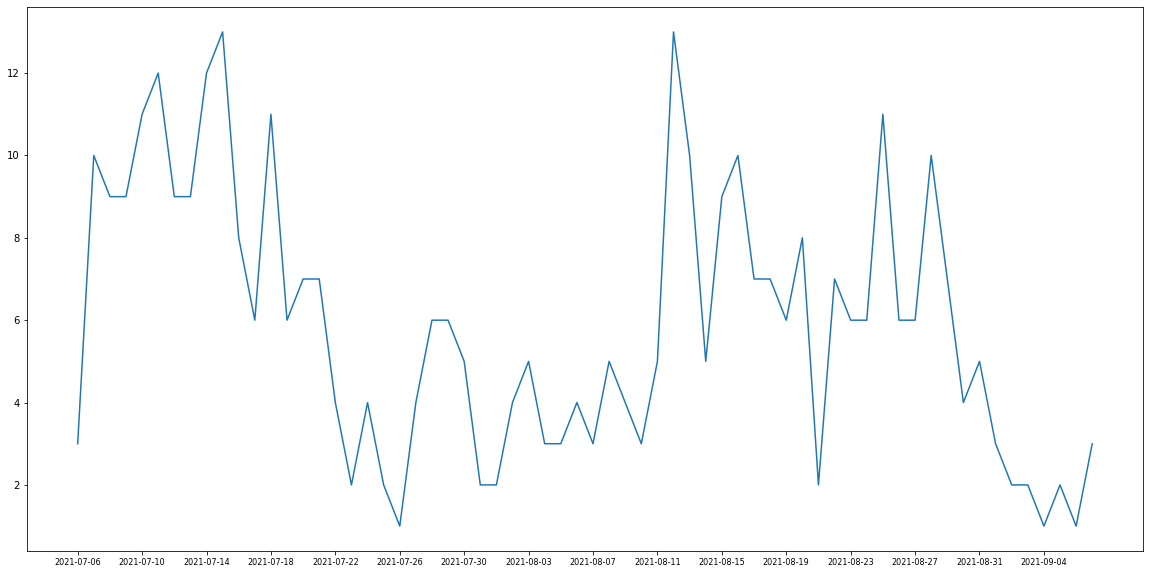

In [37]:
x = np.arange(0,len(day_time_sale),1)
plt.figure(figsize=(20,10))
plt.xticks(range(len(day_time_sale.N_count)), day_time_sale.date, size='small')
plt.xticks(size = 8)
plt.plot(x, day_time_sale.N_count)
plt.locator_params(axis='x', nbins=20)

In [38]:
#now we want to know what is the large sell for each SKU in difference day

In [39]:
Totoal_sell = cooler.groupby(['date','Item - SKU'])['Item - Price'].sum().to_frame("Sum").reset_index()

In [40]:
Totoal_sell

,date,Item - SKU,Sum
0,2021-07-06,Air-cooler-Non-0001,159.99
1,2021-07-06,Air-cooler-Non-0002,439.98
2,2021-07-07,Air-cooler-Non-0002,1919.90
3,2021-07-08,Air-cooler-Non-0001,179.99
4,2021-07-08,Air-cooler-Non-0002,1319.94
...,...,...,...
142,2021-09-04,P-Aircooler-0003,619.99
143,2021-09-05,P-Aircooler-0003,1239.98
144,2021-09-06,P-Aircooler-0003,619.99
145,2021-09-07,Air-cooler-Tower-5,531.98


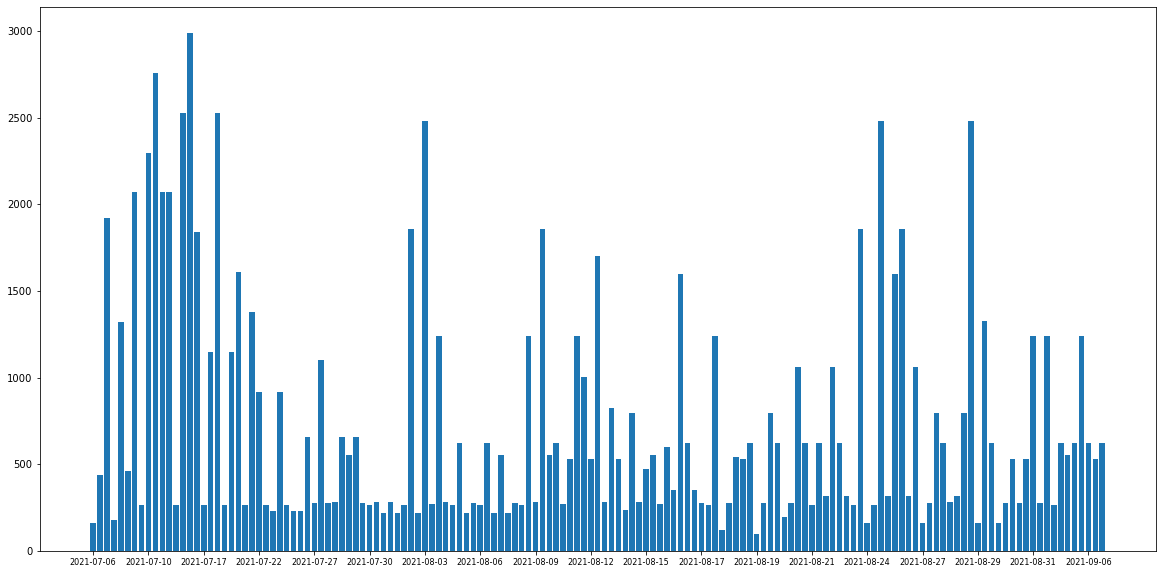

In [41]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(Totoal_sell.Sum)), Totoal_sell.date, size='small')
plt.xticks(size = 8)
plt.bar(range(len(Totoal_sell.Sum)),Totoal_sell.Sum,align='center')

plt.locator_params(axis='x', nbins=20)


In [42]:
Totoal_sell['Item - SKU'].unique()

array(['Air-cooler-Non-0001', 'Air-cooler-Non-0002',
       'Air-cooler-Non-0002-1', 'Air-cooler-Big-1', 'Air-cooler-Tower-3',
       'Air-cooler-Tower-5', 'P-Aircooler-0003', 'Air-cooler-Tower-4'],
      dtype=object)

In [43]:
A2 = Totoal_sell[Totoal_sell['Item - SKU'] =='Air-cooler-Non-0002']

In [44]:
A2

,date,Item - SKU,Sum
1,2021-07-06,Air-cooler-Non-0002,439.98
2,2021-07-07,Air-cooler-Non-0002,1919.90
4,2021-07-08,Air-cooler-Non-0002,1319.94
6,2021-07-09,Air-cooler-Non-0002,2069.91
8,2021-07-10,Air-cooler-Non-0002,2299.90
9,2021-07-11,Air-cooler-Non-0002,2759.88
10,2021-07-12,Air-cooler-Non-0002,2069.91
11,2021-07-13,Air-cooler-Non-0002,2069.91
13,2021-07-14,Air-cooler-Non-0002,2529.89
14,2021-07-15,Air-cooler-Non-0002,2989.87


In [45]:
B2 = Totoal_sell[Totoal_sell['Item - SKU'] =='Air-cooler-Big-1']
B2

,date,Item - SKU,Sum
7,2021-07-10,Air-cooler-Big-1,263.99
12,2021-07-14,Air-cooler-Big-1,263.99
16,2021-07-17,Air-cooler-Big-1,263.99
19,2021-07-19,Air-cooler-Big-1,263.99
22,2021-07-21,Air-cooler-Big-1,263.99
25,2021-07-23,Air-cooler-Big-1,263.99
28,2021-07-25,Air-cooler-Big-1,263.99
35,2021-07-29,Air-cooler-Big-1,279.99
41,2021-07-31,Air-cooler-Big-1,279.99
43,2021-08-01,Air-cooler-Big-1,279.99


In [46]:
T3 = Totoal_sell[Totoal_sell['Item - SKU'] =='Air-cooler-Tower-3']
T3

,date,Item - SKU,Sum
32,2021-07-27,Air-cooler-Tower-3,275.99
34,2021-07-28,Air-cooler-Tower-3,275.99
37,2021-07-29,Air-cooler-Tower-3,551.98
39,2021-07-30,Air-cooler-Tower-3,275.99
55,2021-08-06,Air-cooler-Tower-3,275.99
59,2021-08-07,Air-cooler-Tower-3,551.98
61,2021-08-08,Air-cooler-Tower-3,275.99
66,2021-08-10,Air-cooler-Tower-3,551.98
81,2021-08-15,Air-cooler-Tower-3,551.98
88,2021-08-17,Air-cooler-Tower-3,275.99


In [47]:
P3 = Totoal_sell[Totoal_sell['Item - SKU'] =='P-Aircooler-0003']
P3

,date,Item - SKU,Sum
46,2021-08-02,P-Aircooler-0003,1859.97
48,2021-08-03,P-Aircooler-0003,2479.96
50,2021-08-04,P-Aircooler-0003,1239.98
53,2021-08-05,P-Aircooler-0003,619.99
57,2021-08-06,P-Aircooler-0003,619.99
63,2021-08-08,P-Aircooler-0003,1239.98
65,2021-08-09,P-Aircooler-0003,1859.97
67,2021-08-10,P-Aircooler-0003,619.99
70,2021-08-11,P-Aircooler-0003,1239.98
73,2021-08-12,P-Aircooler-0003,1699.97


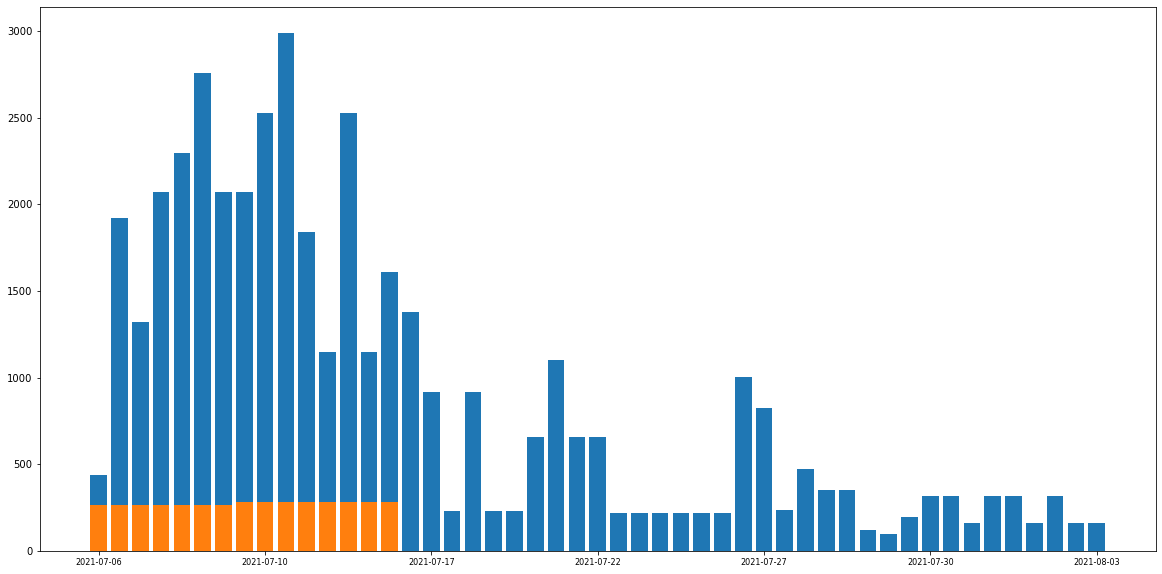

In [49]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(Totoal_sell.Sum)), Totoal_sell.date, size='small')
plt.xticks(size = 8)
plt.bar(range(len(A2.Sum)),A2.Sum,align='center')
plt.bar(range(len(B2.Sum)),B2.Sum,align='center')
plt.locator_params(axis='x', nbins=20)


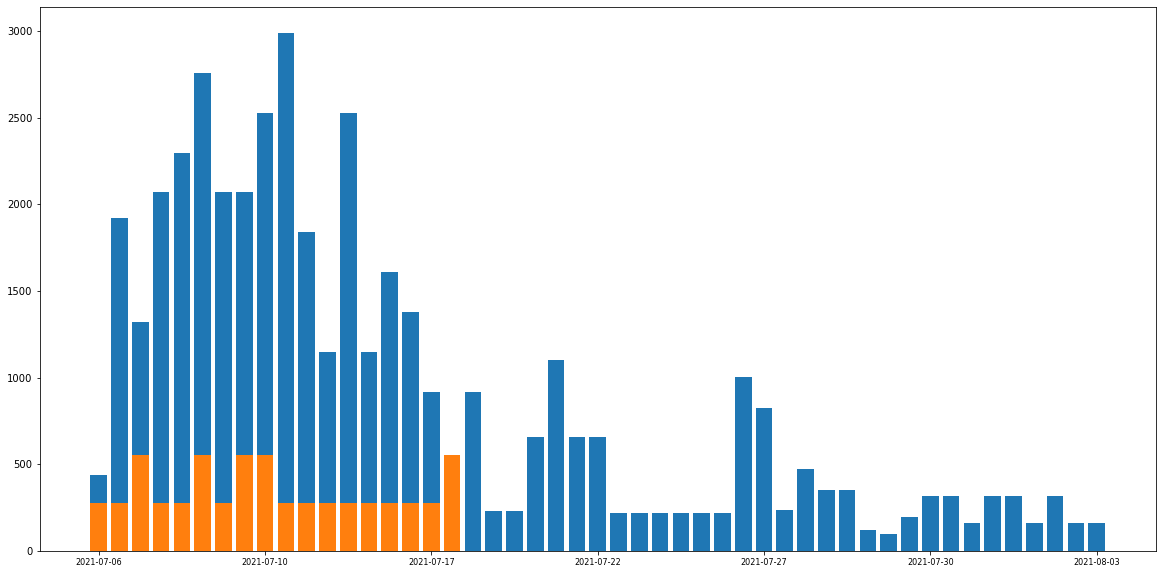

In [51]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(Totoal_sell.Sum)), Totoal_sell.date, size='small')
plt.xticks(size = 8)
plt.bar(range(len(A2.Sum)),A2.Sum,align='center')
plt.bar(range(len(T3.Sum)),T3.Sum,align='center')
plt.locator_params(axis='x', nbins=20)

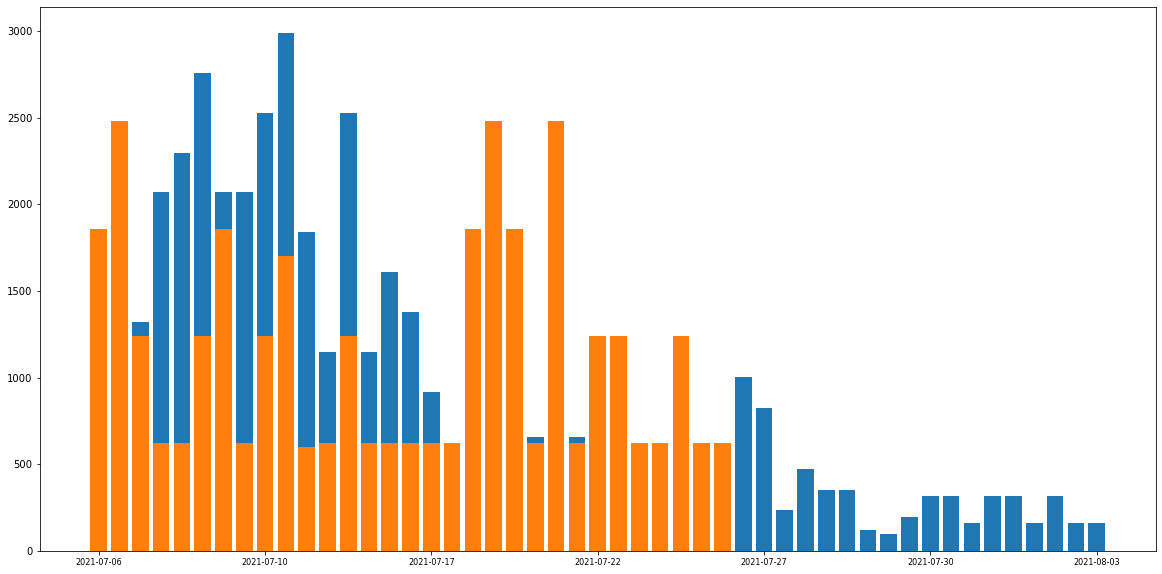

In [54]:
plt.figure(figsize=(20,10))
plt.xticks(range(len(Totoal_sell.Sum)), Totoal_sell.date, size='small')
plt.xticks(size = 8)
plt.bar(range(len(A2.Sum)),A2.Sum,align='center')
plt.bar(range(len(P3.Sum)),P3.Sum,align='center')
plt.locator_params(axis='x', nbins=20)

In [ ]:
#You can see the most sell asin is Air-cooler-Non-0002 but The most profit is asin P-Aircooler-0003

In [ ]:
#source https://www.visualcrossing.com/weather-data location : usa

In [ ]:
#Now we can to pridct is tempture will effect the sell of the cooler 

In [55]:
Temp = 'history_data.csv'

In [56]:
Tmpe = pd.read_csv(Temp)

In [58]:
Tmpe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 101 non-null    object 
 1   Date time            101 non-null    object 
 2   Maximum Temperature  101 non-null    float64
 3   Minimum Temperature  101 non-null    float64
 4   Temperature          101 non-null    float64
 5   Wind Chill           0 non-null      float64
 6   Heat Index           87 non-null     float64
 7   Precipitation        101 non-null    float64
 8   Snow                 101 non-null    int64  
 9   Snow Depth           101 non-null    int64  
 10  Wind Speed           101 non-null    float64
 11  Wind Direction       101 non-null    float64
 12  Wind Gust            67 non-null     float64
 13  Visibility           101 non-null    float64
 14  Cloud Cover          101 non-null    float64
 15  Relative Humidity    101 non-null    flo

<AxesSubplot:xlabel='index'>

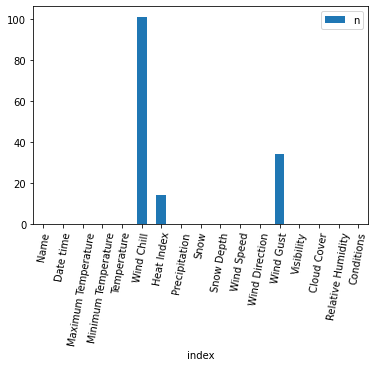

In [65]:
Tmpe.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=80)

In [ ]:
# We see a lot of null value However we just need Max and min temp

In [66]:
Tmpe= Tmpe[['Date time','Maximum Temperature','Minimum Temperature']]

In [71]:
Tmpe['Mean_temp']= (Tmpe.iloc[:,1]+Tmpe.iloc[:,2])/2

In [72]:
Tmpe

,Date time,Maximum Temperature,Minimum Temperature,Mean_temp
0,06/01/2021,77.0,57.2,67.10
1,06/02/2021,80.7,64.4,72.55
2,06/03/2021,82.1,66.7,74.40
3,06/04/2021,84.7,70.0,77.35
4,06/05/2021,91.0,68.6,79.80
...,...,...,...,...
96,09/05/2021,77.1,68.7,72.90
97,09/06/2021,85.8,70.9,78.35
98,09/07/2021,85.7,65.3,75.50
99,09/08/2021,87.0,67.5,77.25


In [78]:
day_time_sale

,date,N_count
0,2021-07-06,3
1,2021-07-07,10
2,2021-07-08,9
3,2021-07-09,9
4,2021-07-10,11
...,...,...
59,2021-09-03,2
60,2021-09-04,1
61,2021-09-05,2
62,2021-09-06,1


In [90]:
Tmpe['Date time'].dt.strftime("%Y-%m-%d")

0      2021-06-01
1      2021-06-02
2      2021-06-03
3      2021-06-04
4      2021-06-05
          ...    
96     2021-09-05
97     2021-09-06
98     2021-09-07
99     2021-09-08
100    2021-09-09
Name: Date time, Length: 101, dtype: object

In [93]:
Tmpe['Date time']= pd.to_datetime(Tmpe['Date time'], errors='coerce')

In [94]:
Tmpe

,Date time,Maximum Temperature,Minimum Temperature,Mean_temp
0,2021-06-01,77.0,57.2,67.10
1,2021-06-02,80.7,64.4,72.55
2,2021-06-03,82.1,66.7,74.40
3,2021-06-04,84.7,70.0,77.35
4,2021-06-05,91.0,68.6,79.80
...,...,...,...,...
96,2021-09-05,77.1,68.7,72.90
97,2021-09-06,85.8,70.9,78.35
98,2021-09-07,85.7,65.3,75.50
99,2021-09-08,87.0,67.5,77.25


In [116]:
day_time_sale['date'] = day_time_sale['date'].astype(str)
Tmpe['Date'] = Tmpe['Date time'].astype(str)

In [123]:
Df1 = pd.merge(day_time_sale,Tmpe,left_on='date',right_on='Date')

In [124]:
Df1

,date,N_count,Date time,Maximum Temperature,Minimum Temperature,Mean_temp,Date
0,2021-07-06,3,2021-07-06,92.8,73.6,83.20,2021-07-06
1,2021-07-07,10,2021-07-07,92.8,76.5,84.65,2021-07-07
2,2021-07-08,9,2021-07-08,84.9,72.9,78.90,2021-07-08
3,2021-07-09,9,2021-07-09,89.7,70.9,80.30,2021-07-09
4,2021-07-10,11,2021-07-10,82.9,70.7,76.80,2021-07-10
...,...,...,...,...,...,...,...
59,2021-09-03,2,2021-09-03,78.8,58.4,68.60,2021-09-03
60,2021-09-04,1,2021-09-04,79.8,62.2,71.00,2021-09-04
61,2021-09-05,2,2021-09-05,77.1,68.7,72.90,2021-09-05
62,2021-09-06,1,2021-09-06,85.8,70.9,78.35,2021-09-06


In [125]:
Df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 64 non-null     object        
 1   N_count              64 non-null     int64         
 2   Date time            64 non-null     datetime64[ns]
 3   Maximum Temperature  64 non-null     float64       
 4   Minimum Temperature  64 non-null     float64       
 5   Mean_temp            64 non-null     float64       
 6   Date                 64 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 4.0+ KB


In [126]:
Df1 = Df1[['Date time','Mean_temp','N_count']]

In [127]:
Df1

,Date time,Mean_temp,N_count
0,2021-07-06,83.20,3
1,2021-07-07,84.65,10
2,2021-07-08,78.90,9
3,2021-07-09,80.30,9
4,2021-07-10,76.80,11
...,...,...,...
59,2021-09-03,68.60,2
60,2021-09-04,71.00,1
61,2021-09-05,72.90,2
62,2021-09-06,78.35,1


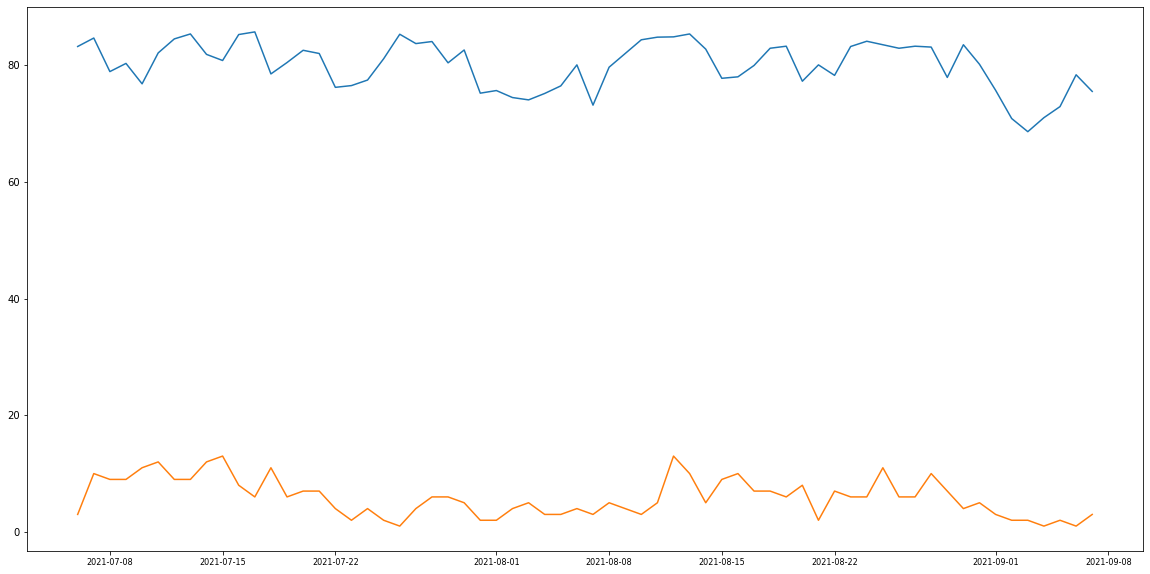

In [136]:
plt.figure(figsize=(20,10))
plt.xticks(size = 8)
plt.plot(Df1['Date time'],Df1.Mean_temp)
plt.plot(Df1['Date time'],Df1.N_count)

In [ ]:
# We want to know if there are any relation between tempture and sale

In [137]:
Df1.corr()

,Mean_temp,N_count
Mean_temp,1.000000,0.429603
N_count,0.429603,1.000000


In [146]:
X = Df1.Mean_temp.values.reshape(-1,1)
y = Df1.N_count.values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


knn = KNeighborsClassifier(n_neighbors =  3)


knn.fit(X_train,y_train)

print(knn.score(X_test, y_test))

0.07692307692307693


C:\Users\nancy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


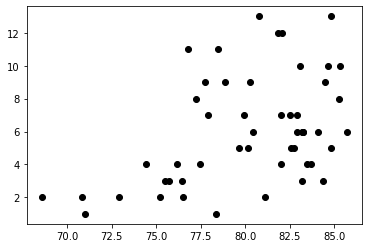

In [145]:
plt.scatter(X_train, y_train,  color='black')

In [ ]:
#As we can as the tempture increase the sale would be increase 

0.18455853132224054


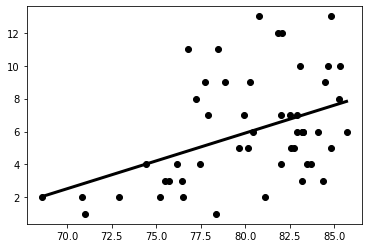

In [151]:
from sklearn.linear_model import LinearRegression
# Create the regressor: reg
reg =  LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)


# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X, y))

# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.scatter(X_train, y_train,  color='black')
plt.show()
